# GC-MS data analysis 

Analysis of the GC-MS raw data generated on 13.12.2023 (2023 samples) and 31.1.2024 (2021 and 2022 samples).

In [94]:
import pandas as pd
import numpy as np
import os

# some statistics 
from scipy.stats import zscore
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import f_oneway



# Import from PubChem 
import requests 
import pubchempy as pcp


# Visualizations 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
%matplotlib inline

## Load raw data 

In [3]:
# set the directory 
os.chdir('/Users/lfloerl/Desktop/MICROTERROIR/Metabolomics/GC-MS')

### 2021 / 2022 data

In [4]:
# load table 
df_2021_2022 = pd.read_csv('rawGCMS_results_2021_2022.csv', index_col=0)
# replace "n.a." to represent scalar missing values
df_2021_2022.replace('n.a.', pd.NA, inplace=True)
# drop CAS column for now 
df_2021_2022.drop(columns=['CAS'], inplace=True)

In [5]:
df_2021_2022.shape

(156, 66)

In [6]:
# first split the dataframes based on the years 
year_2021_columns = [col for col in df_2021_2022.columns if '2021' in col]
year_2022_columns = [col for col in df_2021_2022.columns if '2022' in col]

# Create new DataFrames for each year
df_2021 = df_2021_2022[year_2021_columns].copy()
df_2022 = df_2021_2022[year_2022_columns].copy()

In [7]:
# Extract the last section of each column name
grouped_columns = df_2022.columns.str.rsplit('_', n=1).str[-1]
# Group the DataFrame by the extracted section and calculate the median for each group
df_2022_median = df_2022.groupby(grouped_columns, axis=1).median()
# add back the info to the columns 
df_2022_median = df_2022_median.add_prefix('2022_postMLF_')

# Extract the last section of each column name
grouped_columns = df_2021.columns.str.rsplit('_', n=1).str[-1]
# Group the DataFrame by the extracted section and calculate the median for each group
df_2021_median = df_2021.groupby(grouped_columns, axis=1).median()
# add back the info to the columns 
df_2021_median = df_2021_median.add_prefix('2021_postMLF_')


/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lfl

### 20023 data

In [8]:
# load table 
df_2023 = pd.read_csv('rawGCMS_results_2023.csv', index_col=0)
# replace "n.a." to represent scalar missing values 
df_2023.replace('n.a.', pd.NA, inplace=True)

In [9]:
# split the dataframes based on sample type 
postMLF_columns = [col for col in df_2023.columns if 'PostMLF' in col]
postAF_columns = [col for col in df_2023.columns if 'PostAF' in col]
must_columns = [col for col in df_2023.columns if 'Must' in col]

# Create new DataFrames for each type
df_2023_postMLF = df_2023[postMLF_columns].copy()
df_2023_postAF = df_2023[postAF_columns].copy()
df_2023_must = df_2023[must_columns].copy()

In [10]:
# Extract the last section of each column name
grouped_columns = df_2023_must.columns.str.rsplit('_', n=1).str[-1]
# Group the DataFrame by the extracted section and calculate the median for each group
df_2023_must_median = df_2023_must.groupby(grouped_columns, axis=1).median()
# add back the info to the columns 
df_2023_must_median = df_2023_must_median.add_prefix('2023_must_')

grouped_columns = df_2023_postAF.columns.str.rsplit('_', n=1).str[-1]
df_2023_postAF_median = df_2023_postAF.groupby(grouped_columns, axis=1).median()
df_2023_postAF_median = df_2023_postAF_median.add_prefix('2023_postAF_')

grouped_columns = df_2023_postMLF.columns.str.rsplit('_', n=1).str[-1]
df_2023_postMLF_median = df_2023_postMLF.groupby(grouped_columns, axis=1).median()
df_2023_postMLF_median = df_2023_postMLF_median.add_prefix('2023_postMLF_')

/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lfloerl/miniconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/lfl

In [16]:
df_2023_postMLF_median.head()

,2023_postMLF_Plot12,2023_postMLF_Plot13,2023_postMLF_Plot14,2023_postMLF_Plot15,2023_postMLF_Plot17,2023_postMLF_Plot19,2023_postMLF_Plot20,2023_postMLF_Plot4,2023_postMLF_Plot5,2023_postMLF_Plot9
Name,,,,,,,,,,
Ethyl Acetate,2.001097e+07,8594398.700,2.021134e+07,4.619581e+07,1.525178e+07,1.553679e+07,1.153661e+07,2.174985e+07,1.476611e+07,3.461234e+07
Ethanol,6.070452e+06,6886507.055,2.457068e+06,1.947696e+06,5.933392e+06,1.928943e+06,6.975750e+06,5.060250e+06,3.055956e+06,6.340486e+06
"Butanoic acid, ethyl ester",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hexanal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Isobutyl alcohol,1.240581e+07,5613707.657,7.762944e+06,5.607196e+06,8.073320e+06,3.158120e+06,1.593762e+07,5.227216e+06,4.010103e+06,1.216854e+07


## Visualizations

### Compare the MLF sample from different years

In [11]:
# Check if all DataFrames have the same indices
if df_2021_median.index.equals(df_2021_median.index) and df_2022_median.index.equals(df_2022_median.index) and df_2023_postMLF_median.index.equals(df_2023_postMLF_median.index):
    print("All DataFrames have the same indices.")

else:
    print("Not all DataFrames have the same indices.")

All DataFrames have the same indices.


In [12]:
# for some stupid reason it does not allow me to concat DESPITE the dataframes having the same indices (and when trying to merge it still replicates them)
# so I reindex, concatenate and re-assign the original idex, silly.
df_2021_median_reset = df_2021_median.reset_index(drop=True)
df_2022_median_reset = df_2022_median.reset_index(drop=True)
df_2023_postMLF_median_reset = df_2023_postMLF_median.reset_index(drop=True)

combined_df = pd.concat([df_2021_median_reset, df_2022_median_reset, df_2023_postMLF_median_reset], axis=1)
combined_df.index = [list(df_2021_median.index)]

# drop NaN
combined_df_MLF = combined_df.dropna(how='all')

# Rename columns by removing "postMLF_" from the names
combined_df_MLF.columns = [col.replace("postMLF_", "") for col in combined_df_MLF.columns]


In [13]:
combined_df_MLF.to_csv('postMLF_allYears_median.csv')

In [14]:
combined_df_MLF

,2021_Plot11,2021_Plot12,2021_Plot13,2021_Plot14,2021_Plot15,2021_Plot17,2021_Plot18,2021_Plot19,2021_Plot20,2021_Plot4,...,2023_Plot12,2023_Plot13,2023_Plot14,2023_Plot15,2023_Plot17,2023_Plot19,2023_Plot20,2023_Plot4,2023_Plot5,2023_Plot9
Ethyl Acetate,1.811129e+06,4.236183e+07,5.181863e+07,2.818639e+07,8.831575e+07,4.316983e+07,3.646655e+07,4.031485e+07,4.816806e+07,4.290690e+07,...,2.001097e+07,8.594399e+06,2.021134e+07,4.619581e+07,1.525178e+07,1.553679e+07,1.153661e+07,2.174985e+07,1.476611e+07,3.461234e+07
Ethanol,1.637500e+07,9.024714e+06,1.881738e+07,9.356524e+06,1.601585e+07,1.067238e+07,5.913639e+06,3.454641e+06,1.871734e+07,1.081174e+07,...,6.070452e+06,6.886507e+06,2.457068e+06,1.947696e+06,5.933392e+06,1.928943e+06,6.975750e+06,5.060250e+06,3.055956e+06,6.340486e+06
Isobutyl alcohol,6.902747e+06,2.174849e+07,5.679505e+06,2.130584e+07,6.356462e+06,2.550332e+07,8.490144e+06,1.092357e+07,9.036955e+06,1.725620e+07,...,1.240581e+07,5.613708e+06,7.762944e+06,5.607196e+06,8.073320e+06,3.158120e+06,1.593762e+07,5.227216e+06,4.010103e+06,1.216854e+07
"1-Butanol, 3-methyl-, acetate",1.899402e+07,9.784504e+06,NaN,1.215575e+07,1.102511e+07,1.231024e+07,8.727350e+06,9.985264e+06,1.012780e+07,1.022107e+07,...,8.877611e+06,8.244733e+06,2.879478e+06,4.771427e+06,4.976080e+06,2.367384e+06,1.738078e+07,1.086391e+07,1.053472e+07,2.972238e+06
"1-Butanol, 2-methyl-",3.016500e+07,3.215372e+07,4.654159e+07,3.375732e+07,4.259359e+07,3.300993e+07,2.832276e+07,2.694811e+07,2.471367e+07,3.320036e+07,...,5.630000e+06,4.349040e+06,3.893764e+06,3.949032e+06,3.697688e+06,NaN,4.958535e+06,3.283599e+06,4.495658e+06,7.319894e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"9-Octadecenoic acid (Z)-, methyl ester",1.979750e+07,2.367365e+07,2.118195e+07,5.631151e+06,9.118816e+06,1.462245e+07,1.315378e+07,1.661029e+07,1.354848e+07,1.727872e+07,...,2.175854e+06,1.985483e+06,1.868272e+06,3.125810e+06,2.054677e+06,2.055995e+06,2.235908e+06,3.408042e+06,1.937525e+06,1.591898e+06
Ethyl linoleate,1.178141e+07,1.617494e+07,1.584087e+07,7.971309e+06,7.933381e+06,8.915820e+06,8.580856e+06,9.383738e+06,7.869257e+06,9.443362e+06,...,1.013725e+06,8.575835e+05,7.490657e+05,1.170339e+06,9.842103e+05,9.161528e+05,1.080732e+06,1.561080e+06,7.437680e+05,7.080368e+05
"Decanedioic acid, dibutyl ester",4.583110e+06,2.573462e+06,3.590947e+06,3.612840e+06,3.680478e+06,3.715580e+06,4.393560e+06,NaN,4.005756e+06,4.996626e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3-methylhomoadamantane,NaN,NaN,NaN,3.228533e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Heatmap MLF samples 

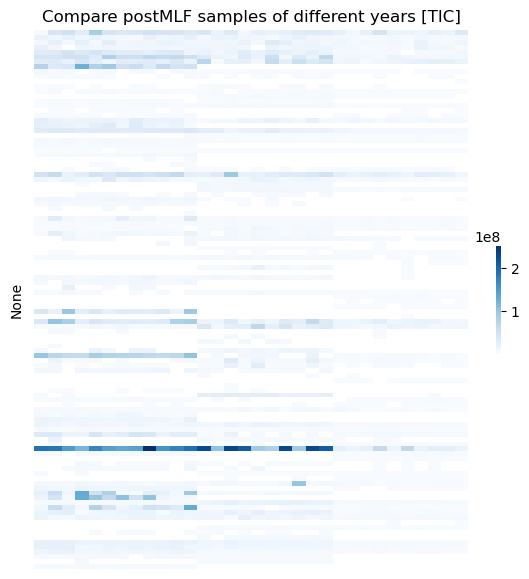

In [15]:
# Create a heatmap using Seaborn with a blue color scheme
plt.figure(figsize=(7, 7))
#sns.set(rc={'axes.labelsize': 0, 'xtick.labelsize': 0.2, 'ytick.labelsize': 0.2})
sns.heatmap(combined_df_MLF, cmap='Blues', annot=False, cbar=True, cbar_kws={'shrink': 0.2}, 
            linewidths=0, xticklabels=False, yticklabels=False)
plt.title('Compare postMLF samples of different years [TIC]')
plt.show()

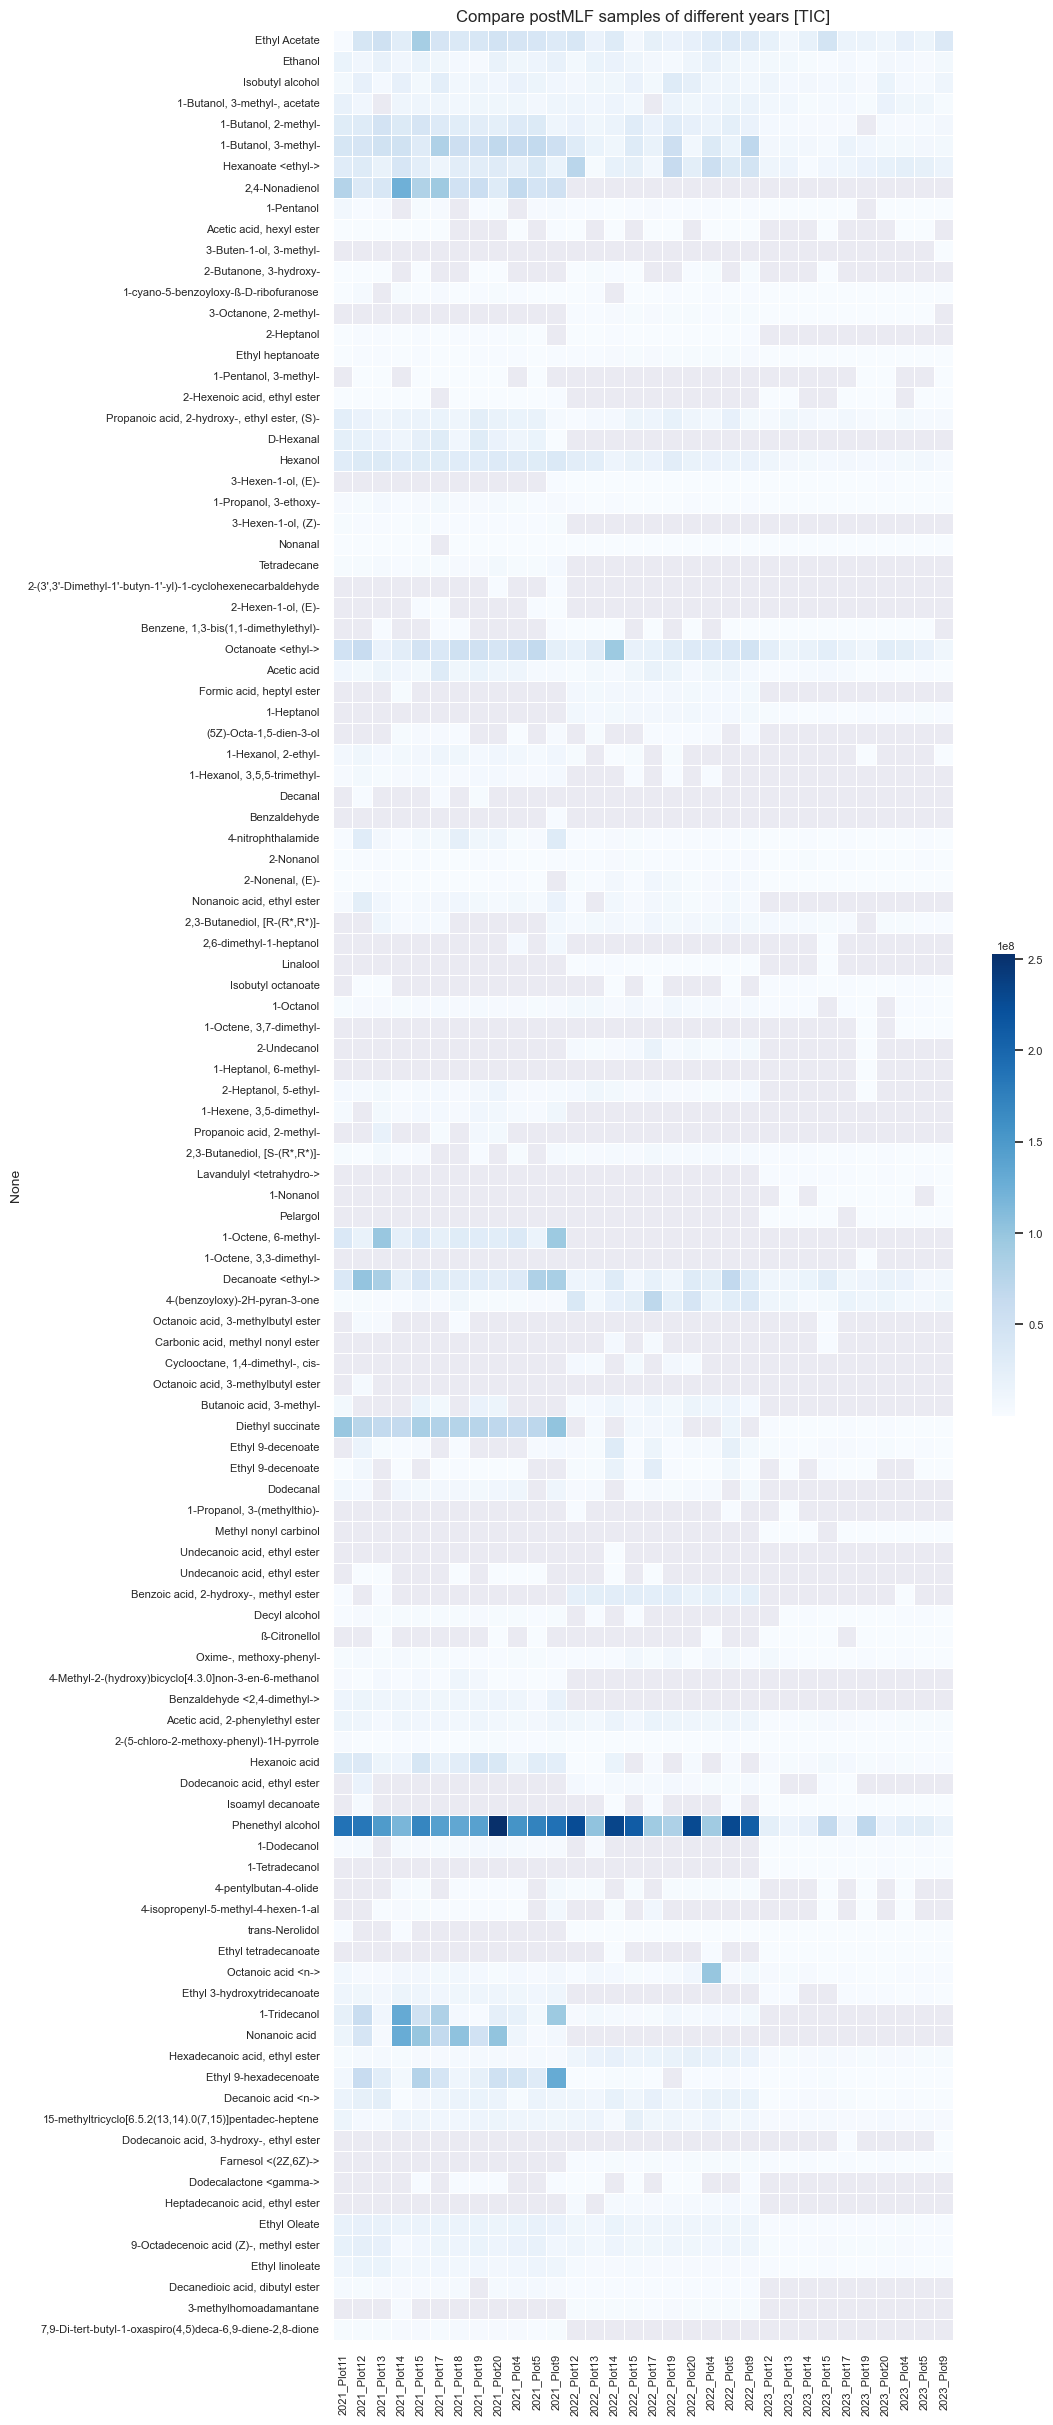

In [19]:
# Create a heatmap using Seaborn with a blue color scheme
plt.figure(figsize=(10, 30))
sns.set(rc={'axes.labelsize': 10, 'xtick.labelsize': 8, 'ytick.labelsize': 8})
sns.heatmap(combined_df_MLF, cmap='Blues', annot=False, cbar=True, cbar_kws={'shrink': 0.2}, linewidths=.5)
plt.title('Compare postMLF samples of different years [TIC]')
plt.show()

#### Heatmap Top variable compounds

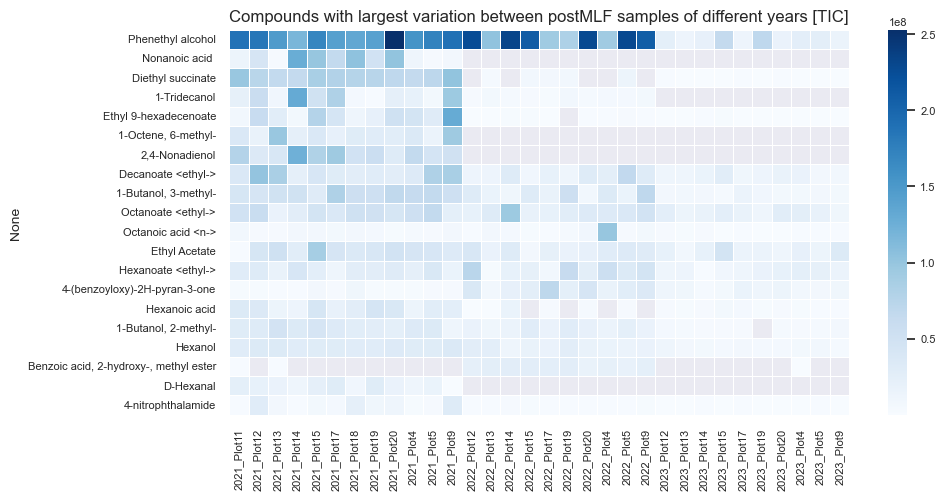

In [89]:
# Calculate row-wise variation and sort by it

combined_df_MLF_var = combined_df_MLF.copy()

# add column for variation along the rows (samples)
combined_df_MLF_var['Variation'] = combined_df_MLF_var.var(axis=1)
# sort 
combined_df_MLF_sorted = combined_df_MLF_var.sort_values(by='Variation', ascending=False)

# Select the top 10 rows
df_MLF_top_var = combined_df_MLF_sorted.head(20).drop(columns=['Variation'])

# Create a heatmap
plt.figure(figsize=(10, 5))
sns.set(rc={'axes.labelsize': 10, 'xtick.labelsize': 8, 'ytick.labelsize': 8})
sns.heatmap(df_MLF_top_var, annot=False, cmap='Blues', cbar=True, linewidths=.5)
plt.title('Compounds with largest variation between postMLF samples of different years [TIC]')

plt.savefig('Figures/postMLF-Top20var.png', bbox_inches='tight')
plt.show()

#### PCA Plot of MLF samples 

In [ ]:
# Instantiate PCA with the number of components you want
n_components = 2  # You can choose the number of principal components
pca = PCA(n_components=n_components)

# drop all rows that contain a NaN because PCA can't handle that 
combined_df_MLF_noNA = combined_df_MLF.dropna()

# transpose!
combined_df_MLF_noNA = combined_df_MLF_noNA.transpose()

# add a column that indicates the sample type 
combined_df_MLF_noNA['Year'] = combined_df_MLF_noNA.index.str.split('_').str[0]

# give index a name 
combined_df_MLF_noNA.rename_axis(index='Sample', inplace=True)

combined_df_MLF_noNA.head()

,Ethyl Acetate,Ethanol,Isobutyl alcohol,"1-Butanol, 3-methyl-",Hexanoate <ethyl->,Ethyl heptanoate,"Propanoic acid, 2-hydroxy-, ethyl ester, (S)-",Hexanol,"1-Propanol, 3-ethoxy-",Octanoate <ethyl->,...,2-(5-chloro-2-methoxy-phenyl)-1H-pyrrole,Phenethyl alcohol,Octanoic acid <n->,"Hexadecanoic acid, ethyl ester",Decanoic acid <n->,"15-methyltricyclo[6.5.2(13,14).0(7,15)]pentadec-heptene",Ethyl Oleate,"9-Octadecenoic acid (Z)-, methyl ester",Ethyl linoleate,Year
Sample,,,,,,,,,,,,,,,,,,,,,
2021_Plot11,1.811129e+06,1.637500e+07,6.902747e+06,4.175720e+07,2.947105e+07,6.852252e+05,2.509337e+07,28786466.77,3.225326e+06,4.888353e+07,...,3712961.736,188303682.2,8601414.172,2589606.151,1.491989e+07,1.437797e+07,1.924886e+07,1.979750e+07,1.178141e+07,2021
2021_Plot12,4.236183e+07,9.024714e+06,2.174849e+07,4.310066e+07,3.187762e+07,1.245635e+06,1.766943e+07,34522551.79,2.253106e+06,6.029558e+07,...,133422.637,183704138.0,3824742.284,4921354.711,2.182961e+07,5.530084e+06,2.156473e+07,2.367365e+07,1.617494e+07,2021
2021_Plot13,5.181863e+07,1.881738e+07,5.679505e+06,4.986389e+07,1.787699e+07,1.733348e+06,1.232673e+07,33921056.46,5.756655e+06,1.701943e+07,...,709141.475,147311221.8,3405790.563,4335261.712,2.576496e+07,4.345747e+06,1.949023e+07,2.118195e+07,1.584087e+07,2021
2021_Plot14,2.818639e+07,9.356524e+06,2.130584e+07,5.005006e+07,4.064037e+07,5.069647e+05,1.520900e+07,29132578.26,1.495015e+06,2.750500e+07,...,1292607.016,117279359.6,7837386.525,2038890.400,5.657207e+05,1.374234e+07,1.531875e+07,5.631151e+06,7.971309e+06,2021
2021_Plot15,8.831575e+07,1.601585e+07,6.356462e+06,3.151106e+07,2.555622e+07,1.091209e+06,1.567502e+07,30411175.48,3.231699e+06,4.648248e+07,...,1501846.675,169548168.1,7572468.989,3751819.475,7.265540e+06,1.198036e+07,1.513907e+07,9.118816e+06,7.933381e+06,2021


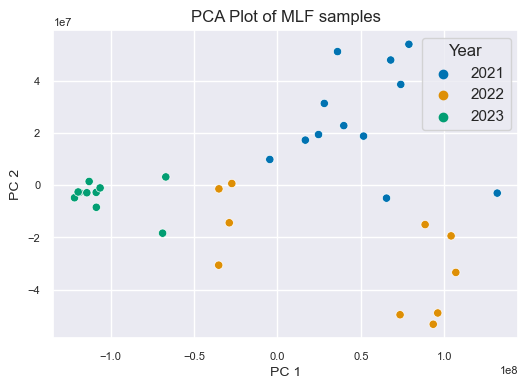

In [ ]:
# Fit and transform the data
pca_result = pca.fit_transform(combined_df_MLF_noNA.iloc[:, :-1])

# Create a DataFrame with the principal components
pca_columns = [f'PC{i}' for i in range(1, n_components + 1)]
pca_MLF = pd.DataFrame(data=pca_result, columns=pca_columns, index=combined_df_MLF_noNA.index)

# add the sample type info back 
pca_MLF['Year'] = combined_df_MLF_noNA['Year']

# Plot the PCA results with observation labels
plt.figure(figsize=(6, 4))

# make scatterplot and color by sample type 
sns.scatterplot(data=pca_MLF, x='PC1', y='PC2', hue='Year', palette='colorblind')

# add the lables 
#for observation, pc1, pc2 in zip(combined_df_MLF_noNA.index, pca_MLF['PC1'], pca_MLF['PC2']): plt.text(pc1, pc2, observation)

plt.title('PCA Plot of MLF samples')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

### Compare 2023 samples 

In [ ]:
# STUPID 
df_2023_must_median_res = df_2023_must_median.reset_index(drop=True)
df_2023_postAF_median_res = df_2023_postAF_median.reset_index(drop=True)
df_2023_postMLF_median_res = df_2023_postMLF_median.reset_index(drop=True)

combined_df = pd.concat([df_2023_must_median_res, df_2023_postAF_median_res, df_2023_postMLF_median_res], axis=1)
combined_df.index = [list(df_2023_must_median.index)]

# drop NaN
combined_df_2023 = combined_df.dropna(how='all')

# Rename columns by removing "postMLF_" from the names
combined_df_2023.columns = [col.replace("2023_", "") for col in combined_df_2023.columns]

combined_df_2023.head()

,must_Plot12,must_Plot13,must_Plot14,must_Plot15,must_Plot17,must_Plot19,must_Plot20,must_Plot4,must_Plot5,must_Plot9,...,postMLF_Plot12,postMLF_Plot13,postMLF_Plot14,postMLF_Plot15,postMLF_Plot17,postMLF_Plot19,postMLF_Plot20,postMLF_Plot4,postMLF_Plot5,postMLF_Plot9
Ethyl Acetate,NaN,2346118.710,2.036584e+06,4053001.686,2317408.810,4331182.782,1.506226e+07,1779189.921,1071977.773,1270565.197,...,2.001097e+07,8594398.700,2.021134e+07,4.619581e+07,1.525178e+07,1.553679e+07,1.153661e+07,2.174985e+07,1.476611e+07,3.461234e+07
Ethanol,1.099859e+06,3261678.022,8.317481e+05,2496018.479,1722064.085,1803850.116,1.331229e+06,2446925.739,2256343.139,1181528.965,...,6.070452e+06,6886507.055,2.457068e+06,1.947696e+06,5.933392e+06,1.928943e+06,6.975750e+06,5.060250e+06,3.055956e+06,6.340486e+06
Hexanal,9.813776e+05,844975.174,9.136030e+05,1031523.469,743715.638,553137.700,7.785778e+05,1253765.023,1073623.930,1098022.019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Isobutyl alcohol,1.127076e+05,652948.774,2.342622e+05,477714.800,224597.709,126028.861,2.503491e+05,317258.272,225980.236,207113.824,...,1.240581e+07,5613707.657,7.762944e+06,5.607196e+06,8.073320e+06,3.158120e+06,1.593762e+07,5.227216e+06,4.010103e+06,1.216854e+07
"1-Butanol, 3-methyl-, acetate",NaN,NaN,NaN,NaN,NaN,NaN,2.279559e+05,NaN,NaN,NaN,...,8.877611e+06,8244732.893,2.879478e+06,4.771427e+06,4.976080e+06,2.367384e+06,1.738078e+07,1.086391e+07,1.053472e+07,2.972238e+06


#### Heatmap 2023 samples

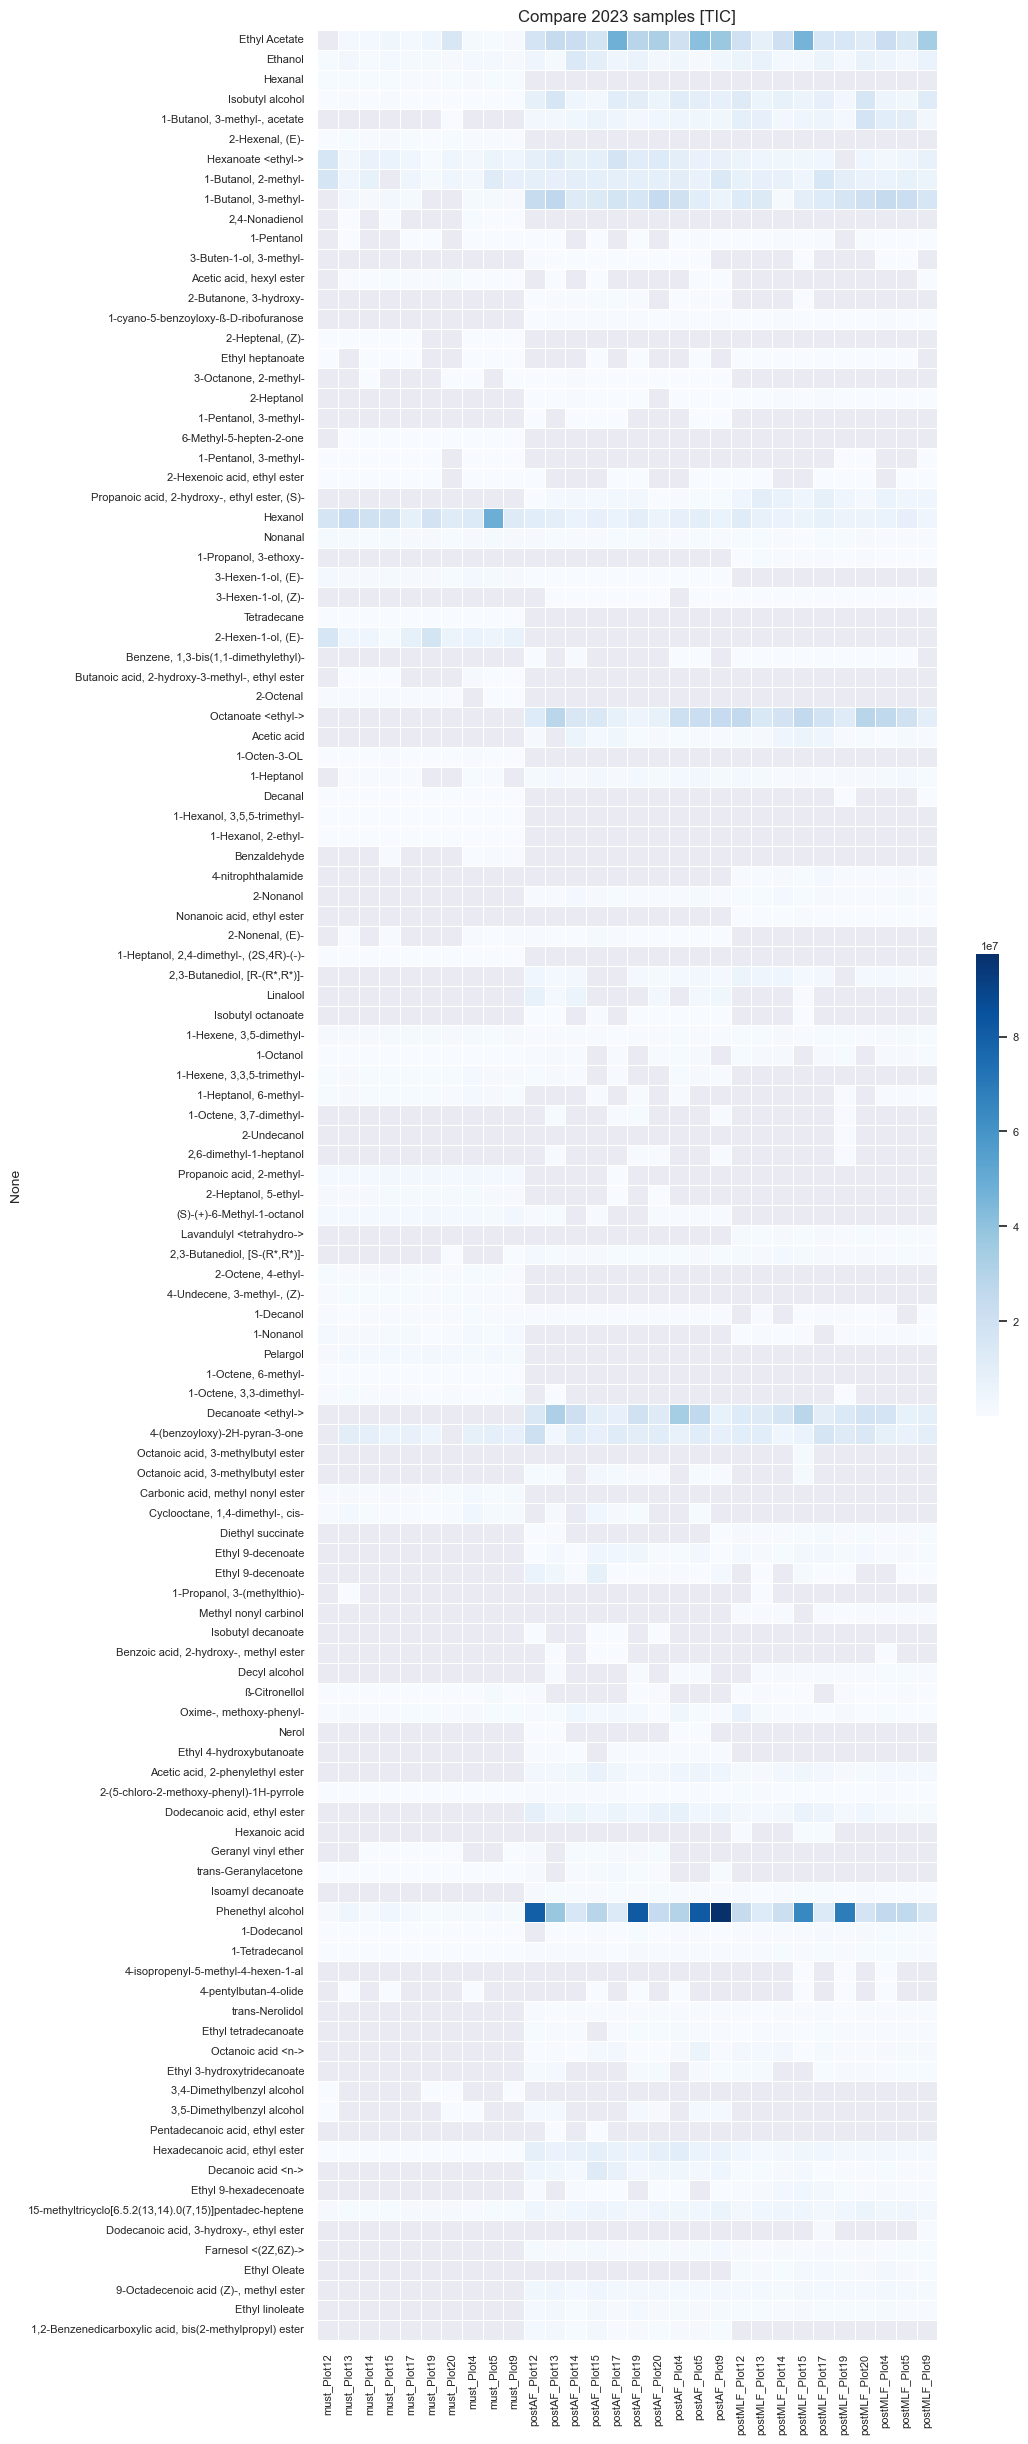

In [ ]:
# Create a heatmap using Seaborn with a blue color scheme
plt.figure(figsize=(10, 30))
sns.set(rc={'axes.labelsize': 10, 'xtick.labelsize': 8, 'ytick.labelsize': 8})
sns.heatmap(combined_df_2023, cmap='Blues', annot=False, cbar=True, cbar_kws={'shrink': 0.2}, linewidths=.5)
plt.title('Compare 2023 samples [TIC]')
plt.show()

#### Heatmap Top variable compounds

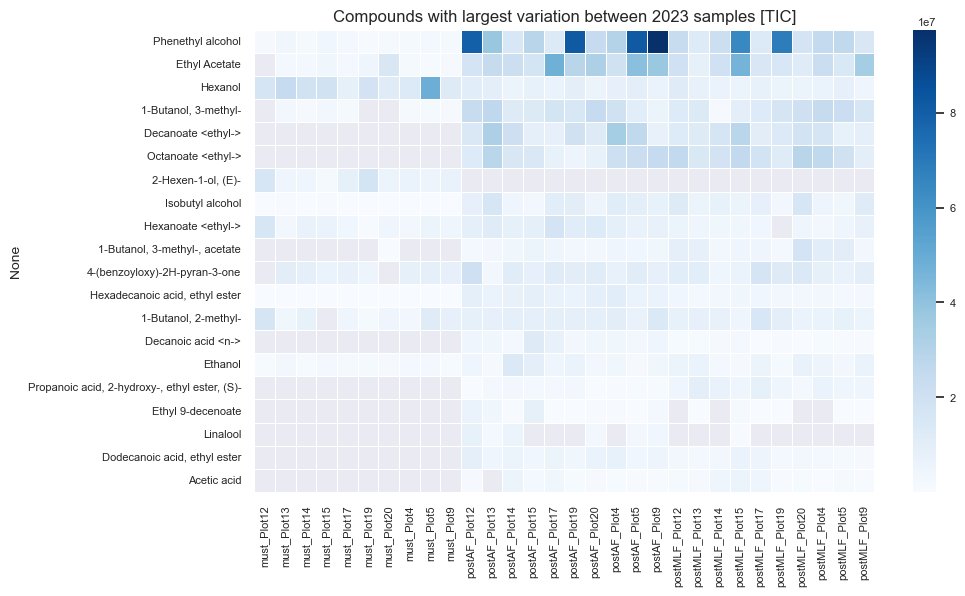

In [ ]:
# Calculate row-wise variation and sort by it

combined_df_2023_var = combined_df_2023.copy()

# add column for variation along the rows (samples)
combined_df_2023_var['Variation'] = combined_df_2023_var.var(axis=1)
# sort 
combined_df_2023_var_sorted = combined_df_2023_var.sort_values(by='Variation', ascending=False)

# Select the top 10 rows
df_2023_top_var = combined_df_2023_var_sorted.head(20).drop(columns=['Variation'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_2023_top_var, annot=False, cmap='Blues', cbar=True, linewidths=.5)
plt.title('Compounds with largest variation between 2023 samples [TIC]')
plt.show()

#### PCA Plot of 2023 samples 

In [ ]:
# Instantiate PCA with the number of components you want
n_components = 2  # You can choose the number of principal components
pca = PCA(n_components=n_components)

# drop all rows that contain a NaN because PCA can't handle that 
combined_df_2023_noNA = combined_df_2023.dropna()

# transpose!
combined_df_2023_noNA = combined_df_2023_noNA.transpose()

# add a column that indicates the sample type 
combined_df_2023_noNA['Group'] = combined_df_2023_noNA.index.str.split('_').str[0]

# give index a name 
combined_df_2023_noNA.rename_axis(index='Sample', inplace=True)

combined_df_2023_noNA.head()

,Ethanol,Isobutyl alcohol,Hexanol,Nonanal,"1-Hexene, 3,5-dimethyl-","Oxime-, methoxy-phenyl-",2-(5-chloro-2-methoxy-phenyl)-1H-pyrrole,Phenethyl alcohol,1-Tetradecanol,"Hexadecanoic acid, ethyl ester","15-methyltricyclo[6.5.2(13,14).0(7,15)]pentadec-heptene",Group
Sample,,,,,,,,,,,,
must_Plot12,1099859.201,112707.6425,16542927.12,1636176.077,1384305.332,485516.807,127588.930,1337814.185,129877.6615,115459.6040,1210001.989,must
must_Plot13,3261678.022,652948.7740,24441711.35,1760685.254,1269056.510,1218304.630,12069.784,4234852.469,170906.5890,168263.1140,1103033.230,must
must_Plot14,831748.100,234262.1605,19055141.67,1081339.838,1320923.711,632652.872,112001.711,1871616.431,111665.3755,102816.5710,1035655.674,must
must_Plot15,2496018.479,477714.8000,18990470.77,1724340.947,1578580.488,622017.332,19631.321,3753498.083,116581.3525,174592.7435,1072942.174,must
must_Plot17,1722064.085,224597.7090,8760159.90,1236885.568,1564779.882,1005760.727,122349.425,2105436.295,124144.4490,136507.7240,1405161.189,must


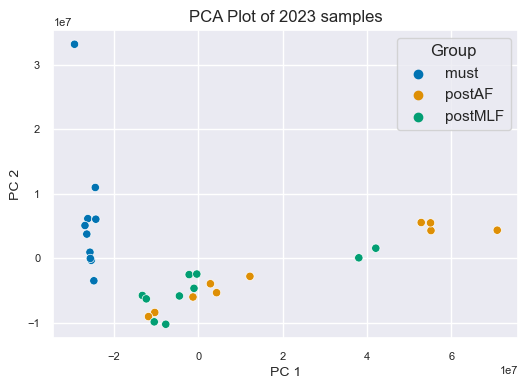

In [ ]:
# Fit and transform the data
pca_result = pca.fit_transform(combined_df_2023_noNA.iloc[:, :-1])

# Create a DataFrame with the principal components
pca_columns = [f'PC{i}' for i in range(1, n_components + 1)]
pca_2023 = pd.DataFrame(data=pca_result, columns=pca_columns, index=combined_df_2023_noNA.index)

# add the sample type info back 
pca_2023['Group'] = combined_df_2023_noNA['Group']

# Plot the PCA results with observation labels
plt.figure(figsize=(6, 4))

# make scatterplot and color by sample type 
sns.scatterplot(data=pca_2023, x='PC1', y='PC2', hue='Group', palette='colorblind')

# add the lables 
#for observation, pc1, pc2 in zip(combined_df_2023_noNA.index, pca_2023['PC1'], pca_2023['PC2']): plt.text(pc1, pc2, observation)

plt.title('PCA Plot of 2023 samples')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

# Diversity analysis 
### Combine all data

In [17]:
# STUPID 
df_2023_must_median_res = df_2023_must_median.reset_index(drop=True)
df_2023_postAF_median_res = df_2023_postAF_median.reset_index(drop=True)
df_2023_postMLF_median_res = df_2023_postMLF_median.reset_index(drop=True)
df_2021_median_reset = df_2021_median.reset_index(drop=True)
df_2022_median_reset = df_2022_median.reset_index(drop=True)


all_combined_df = pd.concat([df_2023_must_median_res, df_2023_postAF_median_res, df_2023_postMLF_median_res, df_2021_median_reset, df_2022_median_reset], axis=1)
all_combined_df.index = [list(df_2023_must_median.index)]

# drop NaN
#combined_df_all = combined_df.dropna(how='all')


In [22]:
all_combined_df.head()

,2023_must_Plot12,2023_must_Plot13,2023_must_Plot14,2023_must_Plot15,2023_must_Plot17,2023_must_Plot19,2023_must_Plot20,2023_must_Plot4,2023_must_Plot5,2023_must_Plot9,...,2022_postMLF_Plot12,2022_postMLF_Plot13,2022_postMLF_Plot14,2022_postMLF_Plot15,2022_postMLF_Plot17,2022_postMLF_Plot19,2022_postMLF_Plot20,2022_postMLF_Plot4,2022_postMLF_Plot5,2022_postMLF_Plot9
Ethyl Acetate,NaN,2346118.710,2.036584e+06,4053001.686,2317408.810,4331182.782,1.506226e+07,1779189.921,1071977.773,1270565.197,...,4.044601e+07,17056514.98,3.186851e+07,7.388409e+06,2.230921e+07,1.737692e+07,21669755.88,28905240.26,3.329922e+07,3.076049e+07
Ethanol,1.099859e+06,3261678.022,8.317481e+05,2496018.479,1722064.085,1803850.116,1.331229e+06,2446925.739,2256343.139,1181528.965,...,6.268163e+06,16225077.22,1.723101e+07,1.279447e+07,7.915647e+06,4.304610e+06,12107578.63,19012617.96,9.910208e+06,8.044402e+06
"Butanoic acid, ethyl ester",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hexanal,9.813776e+05,844975.174,9.136030e+05,1031523.469,743715.638,553137.700,7.785778e+05,1253765.023,1073623.930,1098022.019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Isobutyl alcohol,1.127076e+05,652948.774,2.342622e+05,477714.800,224597.709,126028.861,2.503491e+05,317258.272,225980.236,207113.824,...,7.315582e+06,10733989.70,9.989322e+06,1.709280e+07,6.865375e+06,3.218341e+07,23660700.26,11506454.98,1.243583e+07,8.400517e+06


### Shannon Diversity Index

In [23]:
def shannon_diversity(column):
    """Calculate Shannon Diversity for a single column."""
    counts = column.value_counts()  # Count occurrences of each unique value
    total_count = counts.sum()
    probabilities = counts / total_count
    shannon_entropy = -np.sum(probabilities * np.log(probabilities))
    return shannon_entropy

def shannon_diversity_df(df):
    """Calculate Shannon Diversity for each column in a DataFrame."""
    shannon_diversity_values = {}
    for column in df.columns:
        shannon_diversity_values[column] = shannon_diversity(df[column])
    return pd.Series(shannon_diversity_values)


In [38]:
shannon_diversity_results = pd.DataFrame(shannon_diversity_df(all_combined_df)).reset_index()
shannon_diversity_results.columns = ["Names", "Values"]

In [40]:
# make cols for year and sample type! 
shannon_diversity_results['Sample Type'] = shannon_diversity_results['Names'].apply(lambda x: x.split('_')[1])
shannon_diversity_results['Year'] = shannon_diversity_results['Names'].apply(lambda x: x.split('_')[0])

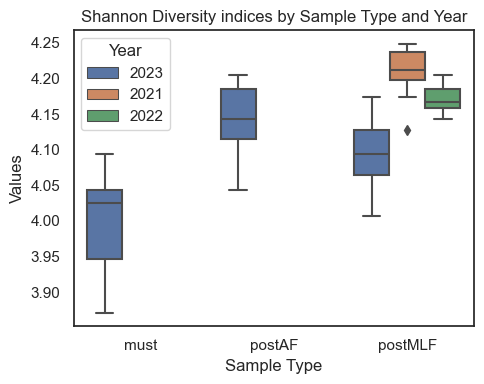

In [81]:
# Plot box plots
plt.figure(figsize=(5, 4))
sns.boxplot(data=shannon_diversity_results, x='Sample Type', y='Values', hue='Year', dodge=True)
plt.title('Shannon Diversity indices by Sample Type and Year')
plt.xlabel('Sample Type')
plt.ylabel('Values')
plt.legend(title='Year')
plt.tight_layout() 
plt.show()

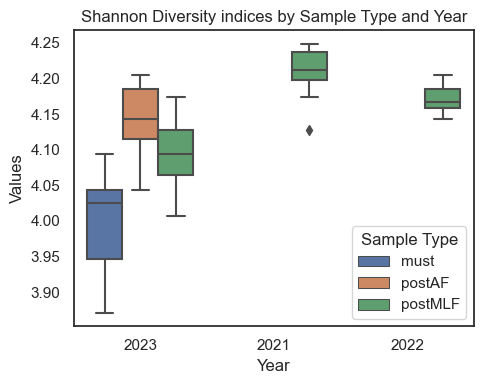

In [80]:
# Plot box plots
plt.figure(figsize=(5, 4))
sns.boxplot(data=shannon_diversity_results, x='Year', y='Values', hue='Sample Type', dodge=True)
plt.title('Shannon Diversity indices by Sample Type and Year')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(title='Sample Type')
plt.tight_layout() 
plt.show()

### Richness

In [61]:
def richness(df):
    """Calculate richness (number of unique values) for each column in a DataFrame."""
    return df.apply(lambda x: x.nunique())

In [64]:
richness_df = pd.DataFrame(richness(all_combined_df)).reset_index()
richness_df.columns = ["Names", "Richness"]

# make cols for year and sample type! 
richness_df['Sample Type'] = richness_df['Names'].apply(lambda x: x.split('_')[1])
richness_df['Year'] = richness_df['Names'].apply(lambda x: x.split('_')[0])

#### Check if statistically significant differences

In [138]:
richness_grouped = richness_df.groupby(['Year', 'Sample Type'])['Richness']

# Extract values for each group
group_postMLF_2023_values = richness_grouped.get_group(('2023', 'postMLF'))
group_postMLF_2022_values = richness_grouped.get_group(('2022', 'postMLF'))
group_postMLF_2021_values = richness_grouped.get_group(('2021', 'postMLF'))

# Perform ANOVA tests
print('RICHNESS postMLF ANOVAS')
anova_result = f_oneway(group_postMLF_2023_values, group_postMLF_2022_values)
print("ANOVA 2023 vs 2022 p-value:", anova_result.pvalue)
anova_result = f_oneway(group_postMLF_2023_values, group_postMLF_2021_values)
print("ANOVA 2023 vs 2021 p-value:", anova_result.pvalue)
anova_result = f_oneway(group_postMLF_2022_values, group_postMLF_2021_values)
print("ANOVA 2022 vs 2021 p-value:", anova_result.pvalue)


print('\n RICHNESS 2023 ANOVAS')
group_must_2023_values = richness_grouped.get_group(('2023', 'must'))
group_postAF_2023_values = richness_grouped.get_group(('2023', 'postAF'))

anova_result = f_oneway(group_must_2023_values, group_postAF_2023_values)
print("ANOVA 2023 must vs postAF p-value:", anova_result.pvalue)
anova_result = f_oneway(group_must_2023_values, group_postMLF_2023_values)
print("ANOVA 2023 must vs postMLF p-value:", anova_result.pvalue)
anova_result = f_oneway(group_postAF_2023_values, group_postMLF_2023_values)
print("ANOVA 2023 postAF vs postMLF p-value:", anova_result.pvalue)

RICHNESS postMLF ANOVAS
ANOVA 2023 vs 2022 p-value: 0.000396286636713438
ANOVA 2023 vs 2021 p-value: 6.666423093236454e-06
ANOVA 2022 vs 2021 p-value: 0.007222694555661361

 RICHNESS 2023 ANOVAS
ANOVA 2023 must vs postAF p-value: 9.593127797722713e-05
ANOVA 2023 must vs postMLF p-value: 0.0034046743277471978
ANOVA 2023 postAF vs postMLF p-value: 0.07557150019416997


#### Box Plots

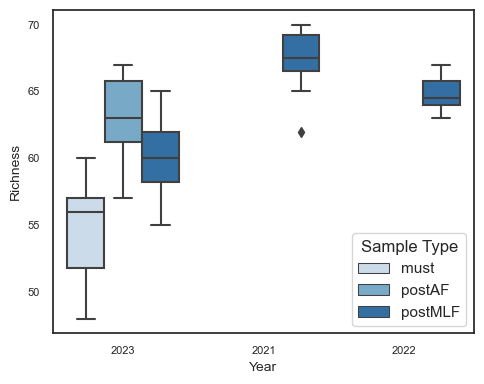

In [144]:
# Plot box plots
sns.set_style(style="white")
plt.figure(figsize=(5, 4))
sns.boxplot(data=richness_df, x='Year', y='Richness', hue='Sample Type', dodge=True, palette="Blues")
#plt.title('Richness by Sample Type and Year')
plt.xlabel('Year')
plt.ylabel('Richness')
plt.legend(title='Sample Type')
plt.tight_layout()
plt.savefig('Figures/Richness-BoxPlot.png', bbox_inches='tight', dpi=1000)
plt.show()

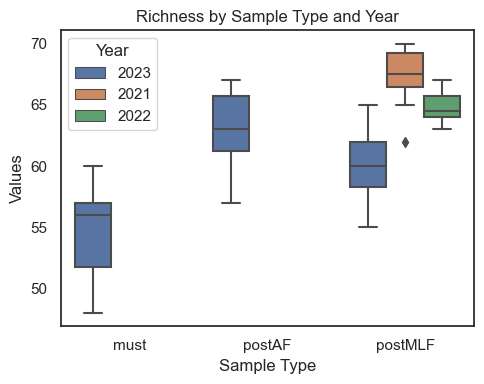

In [78]:
# Plot box plots
sns.set_style(style="white")
plt.figure(figsize=(5, 4))
sns.boxplot(data=richness_df, x='Sample Type', y='Richness', hue='Year', dodge=True)
plt.title('Richness by Sample Type and Year')
plt.xlabel('Sample Type')
plt.ylabel('Values')
plt.legend(title='Year')
plt.tight_layout() 
plt.show()

# Diversity analysis 

### Combine all data

## Associated flavour & odor?
We have sensory analysis data from the 2022 wines...  

In [ ]:
df_2022_median.head()

,2022_postMLF_Plot12,2022_postMLF_Plot13,2022_postMLF_Plot14,2022_postMLF_Plot15,2022_postMLF_Plot17,2022_postMLF_Plot19,2022_postMLF_Plot20,2022_postMLF_Plot4,2022_postMLF_Plot5,2022_postMLF_Plot9
Name,,,,,,,,,,
Ethyl Acetate,4.044601e+07,17056514.98,3.186851e+07,7.388409e+06,2.230921e+07,1.737692e+07,21669755.88,28905240.26,3.329922e+07,3.076049e+07
Ethanol,6.268163e+06,16225077.22,1.723101e+07,1.279447e+07,7.915647e+06,4.304610e+06,12107578.63,19012617.96,9.910208e+06,8.044402e+06
"Butanoic acid, ethyl ester",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hexanal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Isobutyl alcohol,7.315582e+06,10733989.70,9.989322e+06,1.709280e+07,6.865375e+06,3.218341e+07,23660700.26,11506454.98,1.243583e+07,8.400517e+06


> first test with a known URL and the range around it (show how much time it takes for one request?)

> estimate time?

In [ ]:
rw1011471

NameError: name 'rw1011471' is not defined

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep
import random

def scrape_website(url):
    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.text, 'html.parser')

        cas_number = soup.find('td', class_='radw11').get_text(strip=True)
        odor_description = soup.find('td', class_='radw5').find_all('span')[1].get_text(strip=True)

        return cas_number, odor_description, True
    except Exception as e:
        return None, None, False

def main():
    base_url = 'http://www.thegoodscentscompany.com/data/rw{}.html'
    start_index = 1011468
    end_index = 1011473
    data = []
    successful_requests = 0
    failed_requests = 0

    for i in range(start_index, end_index + 1):
        url = base_url.format(i)

        cas, odor, success = scrape_website(url)

        if success:
            successful_requests += 1
            if cas is not None and odor is not None:
                data.append({'CAS': cas, 'Odor Description': odor})
        else:
            failed_requests += 1

        # Irregular microsecond pauses
        sleep(random.uniform(0.1, 1.0))

        # Display count
        if i % 100 == 0:
            print(f"Processed: {i}, Successful: {successful_requests}, Failed: {failed_requests}")

    df = pd.DataFrame(data)
    df.to_csv('scraped_data.csv', index=False)
    print(f"Scraping completed. Successful requests: {successful_requests}, Failed requests: {failed_requests}")

if __name__ == "__main__":
    main()


Scraping completed. Successful requests: 0, Failed requests: 6
